### Análise de Polaridade
(comentários fb)

#### 1. <span style="color:#00b3b3">Instalação de pacotes</span>

In [87]:
if(!require('dplyr')) install.packages('dplyr')
if(!require('tidytext')) install.packages('tidytext')
if(!require('tidyverse')) install.packages('tidyverse')
if(!require('ggplot2')) install.packages('ggplot2')
if(!require('lexiconPT')) install.packages('lexiconPT')
if(!require('wordcloud')) install.packages('wordcloud')
if(!require('ggthemes')) install.packages('ggthemes')
if(!require('igraph')) install.packages('igraph')
if(!require('ggraph')) install.packages('ggraph')
source("http://bioconductor.org/biocLite.R")
biocLite("limma")

Loading required package: igraph

Attaching package: ‘igraph’

The following object is masked from ‘package:tidyr’:

    crossing

The following object is masked from ‘package:tibble’:

    as_data_frame

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) ‘limma’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'backports', 'broom', 'clipr', 'data.table', 'devtools',
  'digest', 'dplyr', 'fs', 'ggforce

#### 2. <span style="color:#00b3b3">Bibliotecas</span>

In [ ]:
install.packages("tm", repos="http://R-Forge.R-project.org")
library(tm)

In [96]:
library(dplyr)
library(tidyverse)
library(tidytext)
library(ggplot2)
library(lexiconPT)

library(readr)
library(stringr)
# library(tidyr)
library(reshape2)
# library(syuzhet)
library(ggthemes)
library(wordcloud)
library(limma)
library(igraph) # gerar grafo
library(ggraph) #plotar grafo

#### 3. <span style="color:#00b3b3">Carrega Dados</span>

In [63]:
# comments <- read.csv(file="comentarios.csv", header=TRUE, sep=",")
comments = read.columns("comentarios.csv", c("comment_message"), sep = ",")
# comments
colnames(comments)
lapply(comments, head)

[1] "comment_message"

$comment_message
[1] "Orgulho de fazer parte disso!!@ melhor banco!!!"    
[2] "Melhor Banco!!"                                     
[3] "#Mpaef #ENEF Me poupe #vemprompaef #MePoupe  Boraa!"
[4] "MELHOR BANCO!"                                      
[5] 👏👏👏                                                  
[6] #VEMPROMPAEF                                         
3916 Levels:  , ;) :) :D ?? ... \U0001f970

#### 4. <span style="color:#00b3b3">Pré-processamento</span>

In [64]:
# personalized = tibble(word = "banrisul", lexicon = "personalized")
custom_stop_words <- bind_rows(stop_words,
                               tibble(word = tm::stopwords("portuguese"),
                                          lexicon = "custom"), tibble(word = "banrisul", lexicon = "personalized"))

custom_stop_words

word,lexicon
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART
accordingly,SMART
across,SMART
actually,SMART
after,SMART


In [65]:
comments <- comments %>% map_if(is.factor, as.character) %>% as_data_frame 
tidy_comments <- comments %>%
  unnest_tokens(word, comment_message) %>%
  anti_join(custom_stop_words)

Joining, by = "word"


In [66]:
comments

comment_message
"""Orgulho de fazer parte disso!!@ melhor banco!!!"""
"""Melhor Banco!!"""
"""#Mpaef #ENEF Me poupe #vemprompaef #MePoupe Boraa!"""
"""MELHOR BANCO!"""
👏👏👏
#VEMPROMPAEF
Amo
"""Nathalia Arcuri"""
"""Parabéns Niressa Leite Dos Santos"""
"""Banco altamente burocratico, cheio de cabides de empregos. Em 5 ou 10 anos bancos como este serao engolidos pelos bancos digitais, e veremos os funcionarios concursados arrogantes do Banrisul, virando atendentes de telemarketing. Vide Uber,, acabaram com a mafia dos taxis. 😂😂😂"""


In [67]:
bing_word_counts <- tidy_comments %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

Joining, by = "word"


In [68]:
tidy_comments %>%
  count(word, sort = TRUE)

word,n
dia,451
parabéns,436
é,427
bom,383
inbox,352
banco,312
agência,244
olá,238
boa,204
obrigado,198


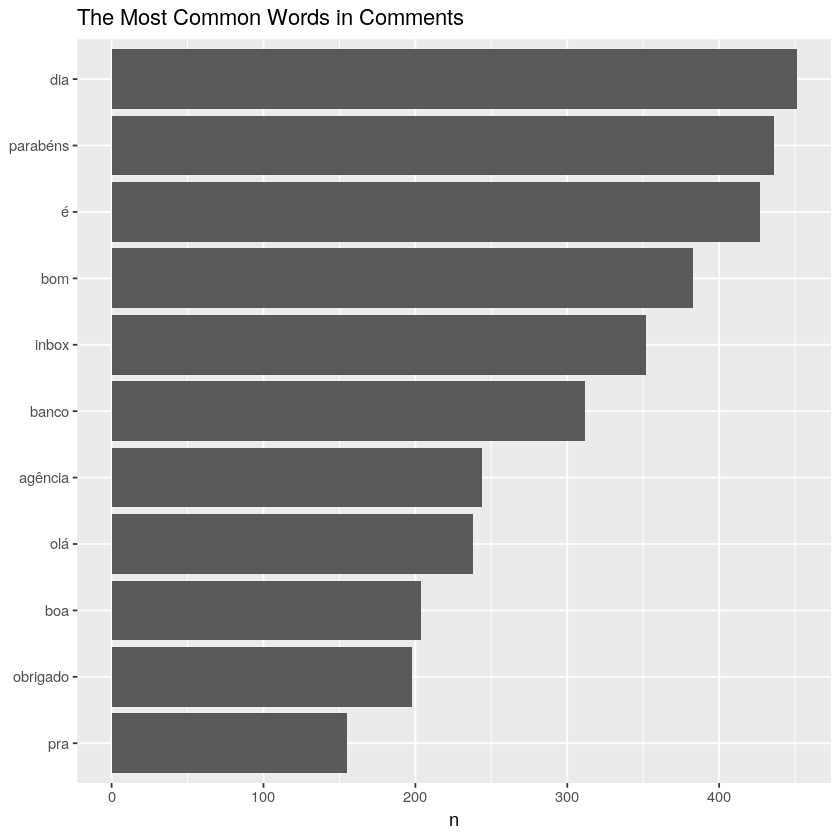

In [69]:
tidy_comments %>%
  count(word, sort = TRUE) %>%
  filter(n > 150) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_col() +
  xlab(NULL) +
  coord_flip() + ggtitle("The Most Common Words in Comments")

In [70]:
bing_word_counts <- tidy_comments %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

Joining, by = "word"


**4.** Polaridade

Selecting by n


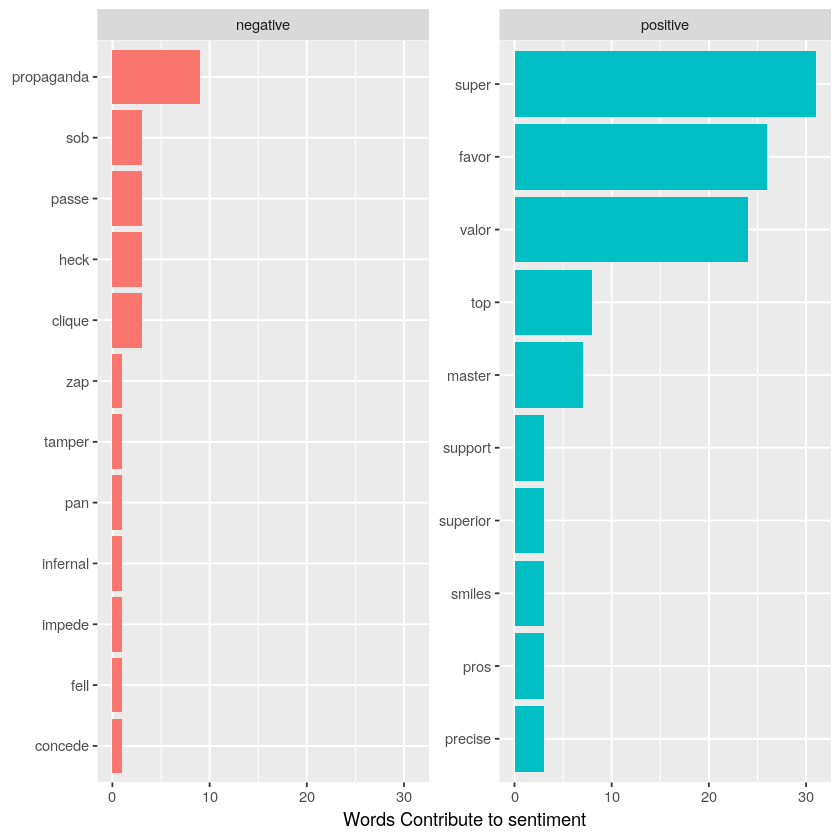

In [71]:
bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Words Contribute to sentiment",
       x = NULL) +
  coord_flip()

Joining, by = "word"


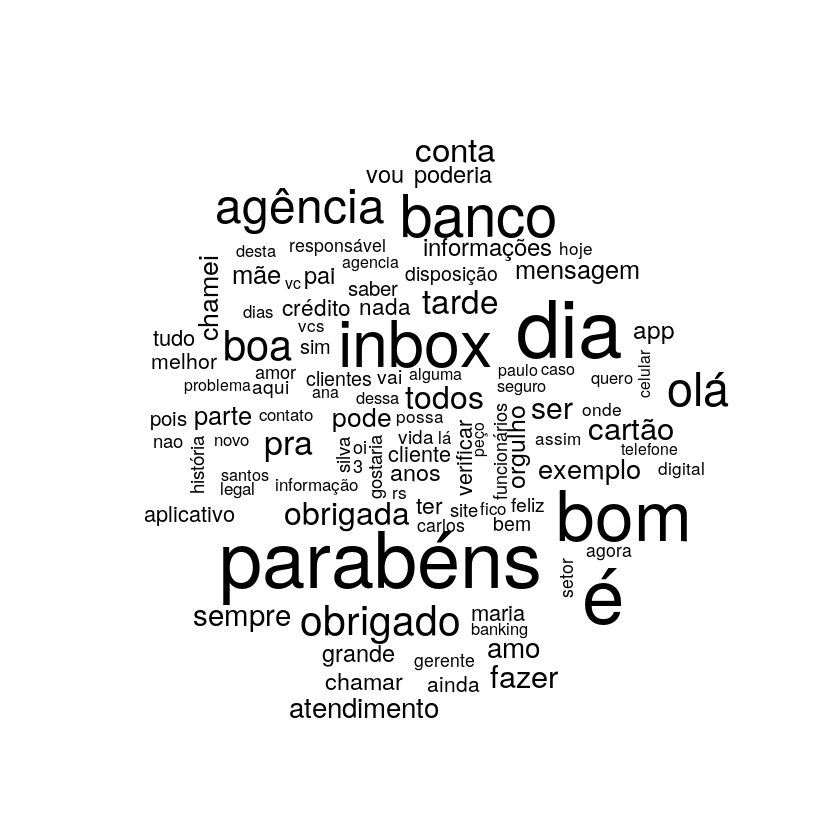

In [72]:
tidy_comments%>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

Joining, by = "word"


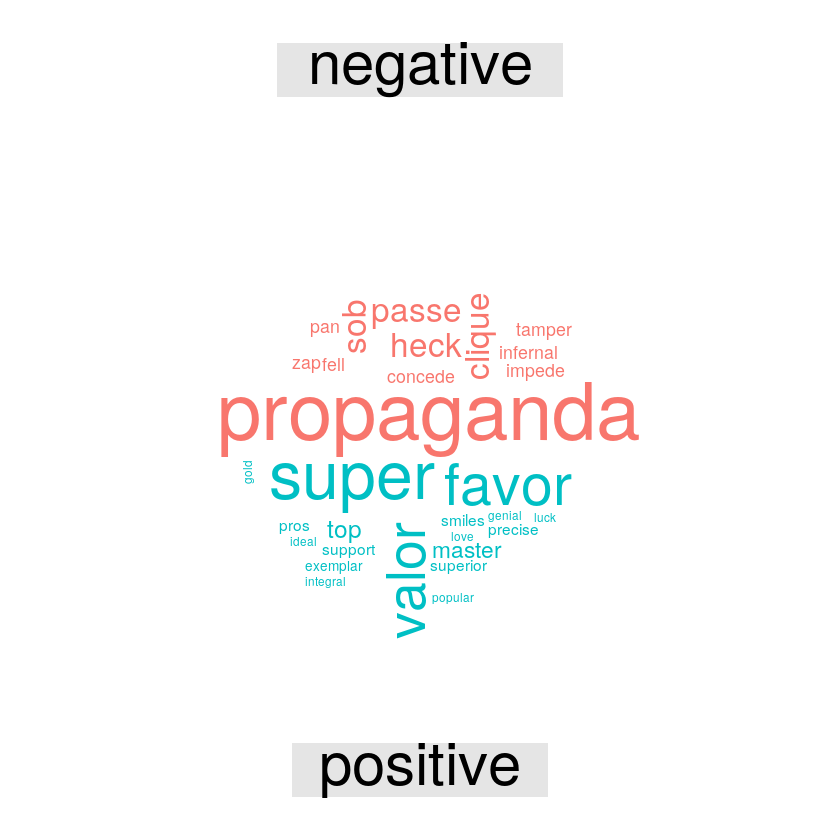

In [73]:
tidy_comments %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#00BFC4"),
                   max.words = 100)

### Relações entre palavras

In [76]:
comments_bigrams <- comments %>%
  unnest_tokens(bigram, comment_message, token = "ngrams", n = 2)
# comments_bigrams

In [80]:
bigrams_separated <- comments_bigrams %>%
  separate(bigram, c("word1", "word2"), sep = " ")
bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)
# bigram_counts

In [82]:
bigrams_united <- bigrams_filtered %>%
  unite(bigram, word1, word2, sep = " ")
# bigrams_united

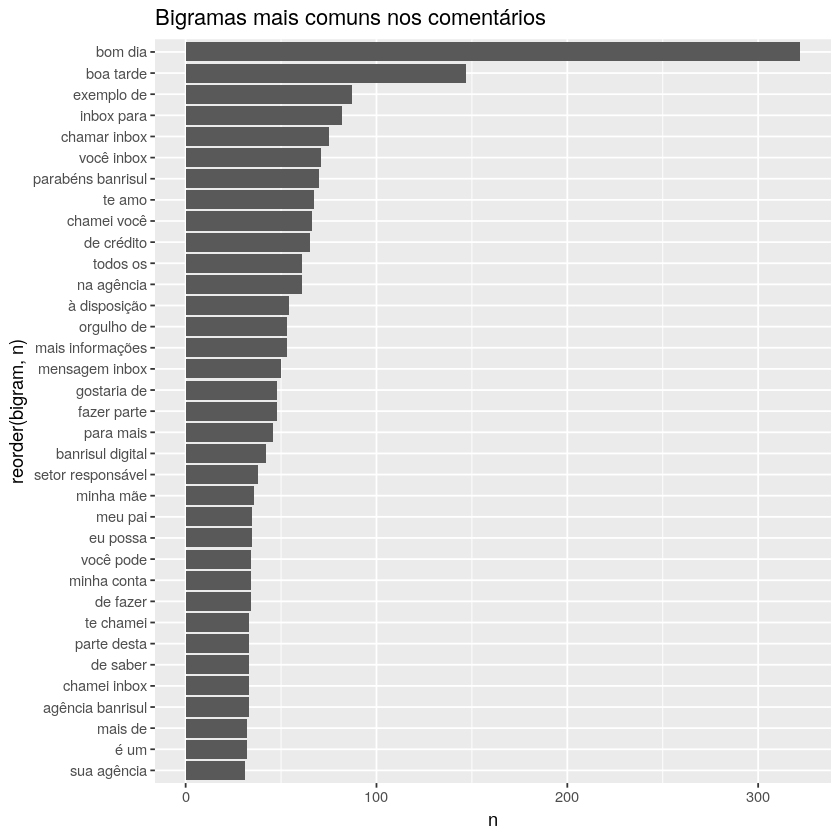

In [85]:
bigram_tf_idf <- bigrams_united %>%
  count(bigram)
bigram_tf_idf <- bigram_tf_idf %>% filter(n>30)
ggplot(aes(x = reorder(bigram, n), y=n), data=bigram_tf_idf) + geom_bar(stat = 'identity') + ggtitle("Bigramas mais comuns nos comentários") + coord_flip()

In [90]:
bigram_graph <- bigram_counts %>%
  filter(n > 20) %>%
  graph_from_data_frame()
# bigram_graph

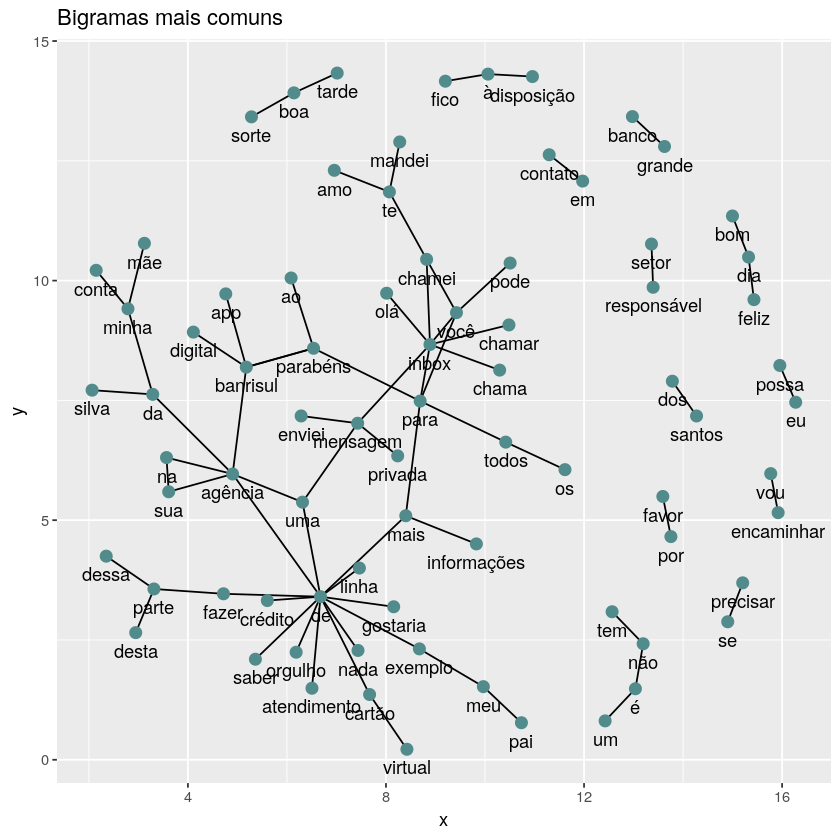

In [94]:
set.seed(2019)
ggraph(bigram_graph, layout = "fr") +
  geom_edge_link() +
  geom_node_point(color = "darkslategray4", size = 3) +
  geom_node_text(aes(label = name), vjust = 1.8) + ggtitle("Bigramas mais comuns")

In [101]:
tale <- character()
tale

character(0)